# EDA

In [ ]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
sns.set(font_scale=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/Bigdata_study/딥러닝스터디-빅분기/신용카드 사용자 연체 예측/train.csv")

# 데이터 설명 
- reality : 부동산 소유 여부 
- child_num : 자녀 수
- income_total : 연간 소득
- income_type : 소득 분류 / Commercial associate(상업 종사자?), Working, State servant(국정원), Pensioner(연금 수령자), Student
- edu_type : 교육 수준 / ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'] 
- family_type: 결혼 여부 / 	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식 /['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
- DAYS_EMPLOYED: 업무 시작일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미, 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형	
- family_size: 가족 규모
- begin_month: 신용카드 발급 월/ 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
## y 
-credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도/ 낮을 수록 높은 신용의 신용카드 사용자를 의미함 




In [ ]:
print(data.shape)
data.head()

(26457, 20)


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# Null 체크
data.isnull().sum() 

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

직업 유형에 8171개의 NaN 값이 존재함.

## Categorical

### Credit

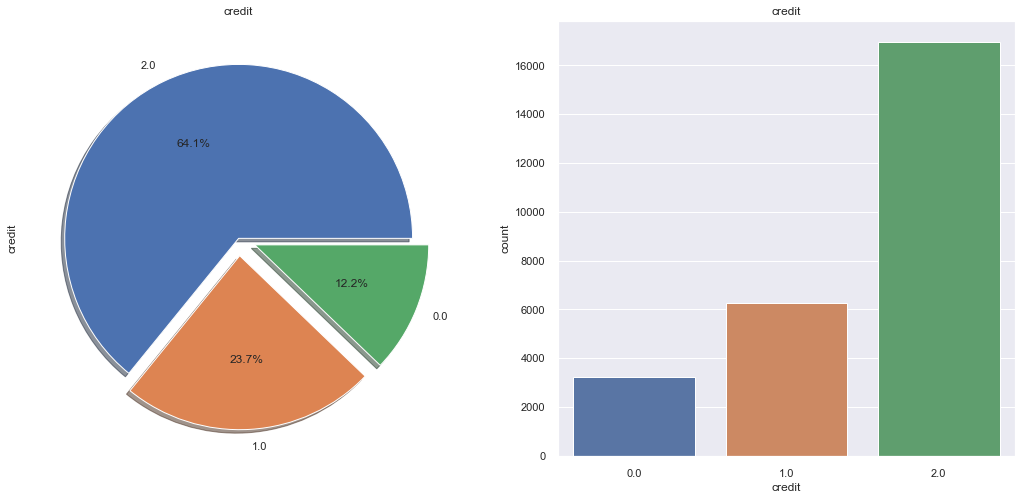

In [ ]:
# Credit의 분포
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=data,ax=ax[1])
ax[1].set_title('credit')
plt.show()

credit: 사용자의 신용카드 대금 연체를 기준의 신용도를 의미하며, 낮을 수록 높은 신용의 신용카드 사용자를 의미함라고 명시되어있다. 본 데이터에서는  낮은 신용의 신용카드 사용자가 많은 비율을 차지함을 알 수 있다.

### 성별 Gender

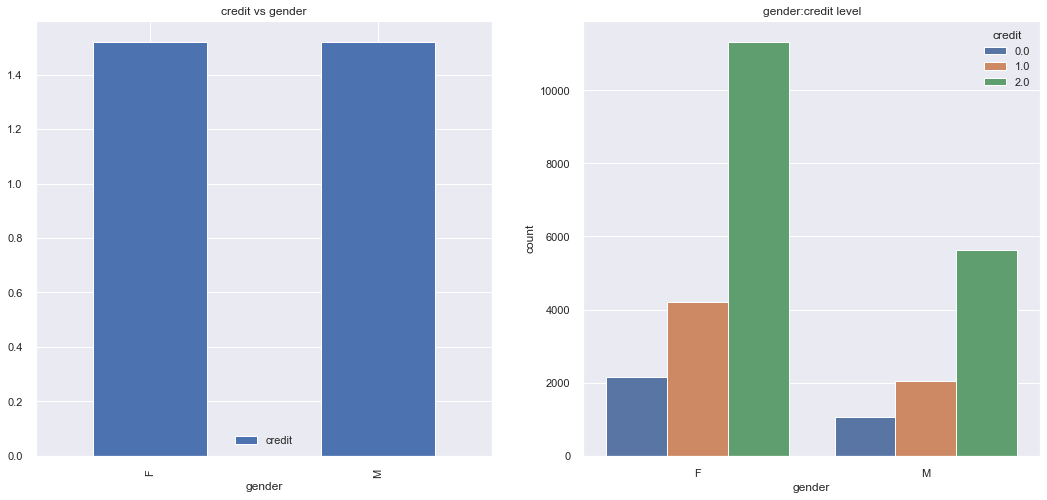

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs gender')
sns.countplot('gender',hue='credit',data=data,ax=ax[1])
ax[1].set_title('gender:credit level')
plt.show()

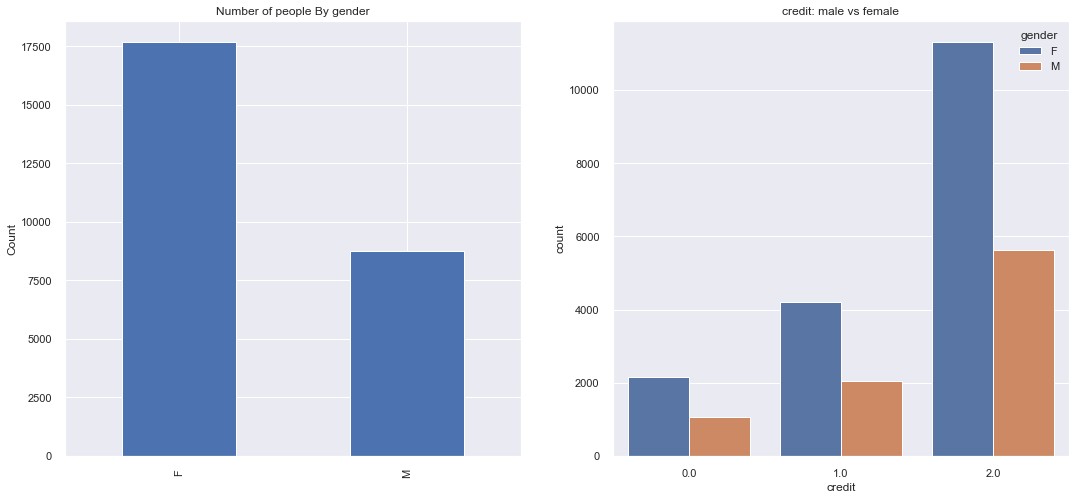

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By gender')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='gender',data=data,ax=ax[1])
ax[1].set_title('credit: male vs female')
plt.show()

### 차 Car

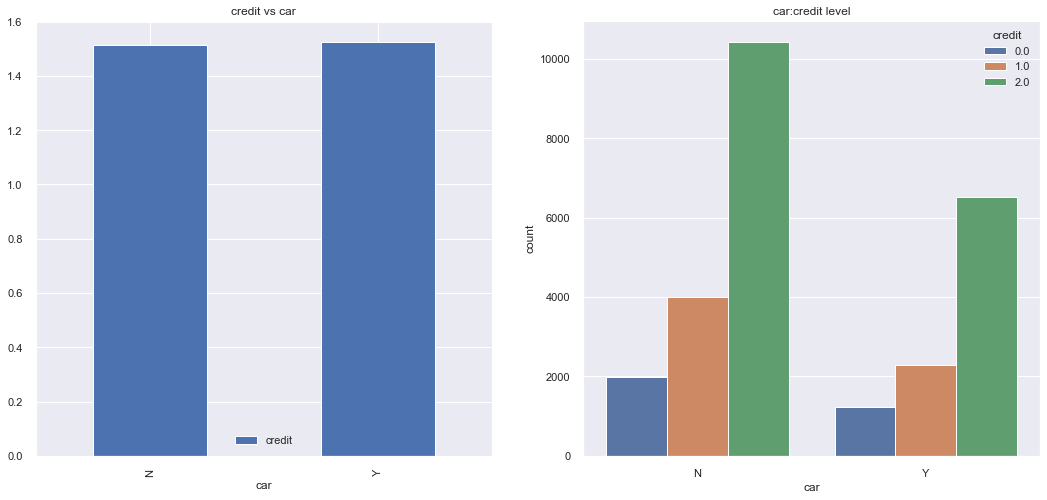

In [ ]:
# Credit vs Car
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=data,ax=ax[1])
ax[1].set_title('car:credit level')
plt.show()

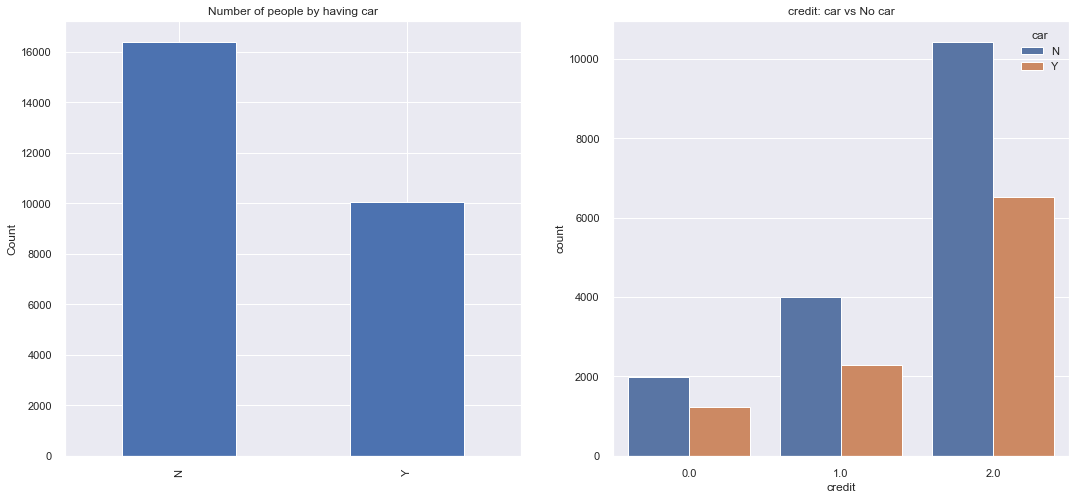

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['car'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people by having car')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='car',data=data,ax=ax[1])
ax[1].set_title('credit: car vs No car')
plt.show()

### 부동산 Reality

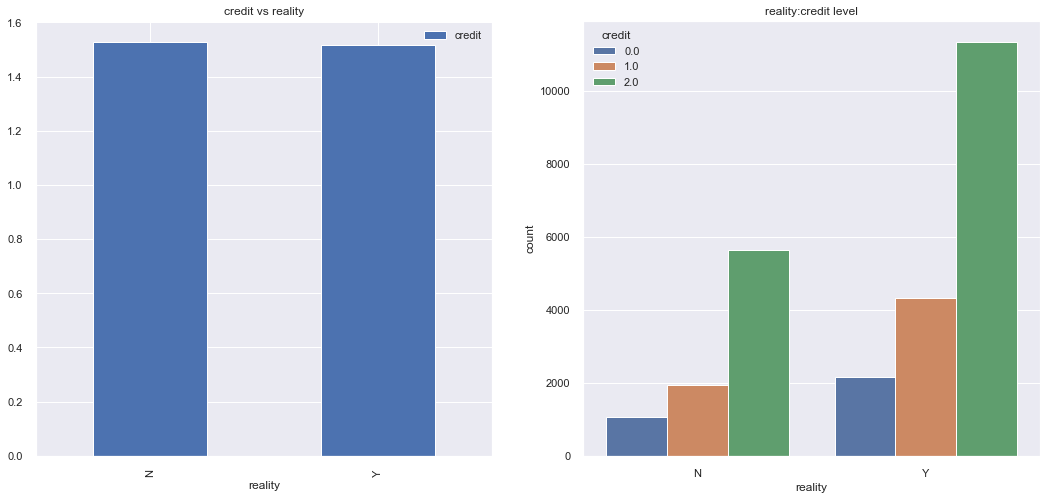

In [ ]:
# Credit vs Reality
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=data,ax=ax[1])
ax[1].set_title('reality:credit level')
plt.show()

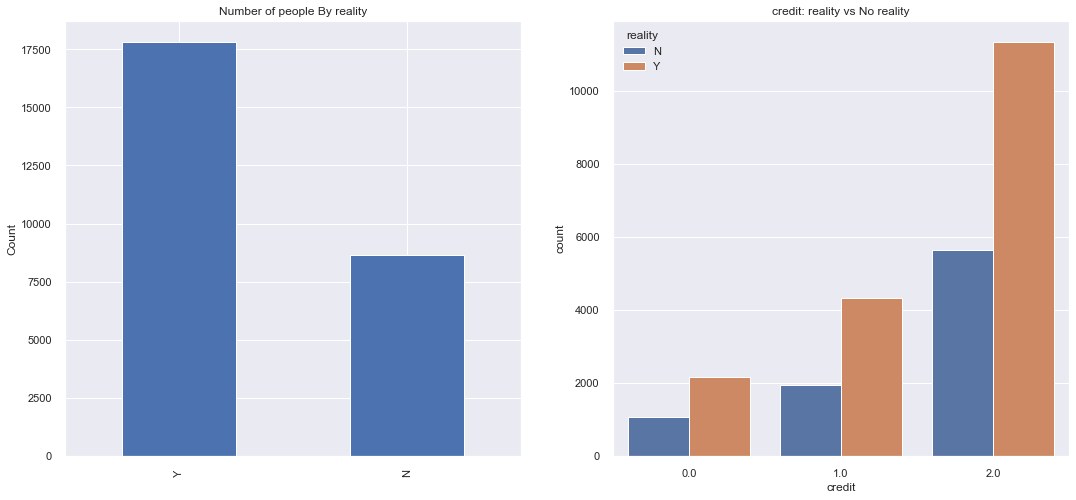

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['reality'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By reality')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='reality',data=data,ax=ax[1])
ax[1].set_title('credit: reality vs No reality')
plt.show()

### 가족  구성 Family type

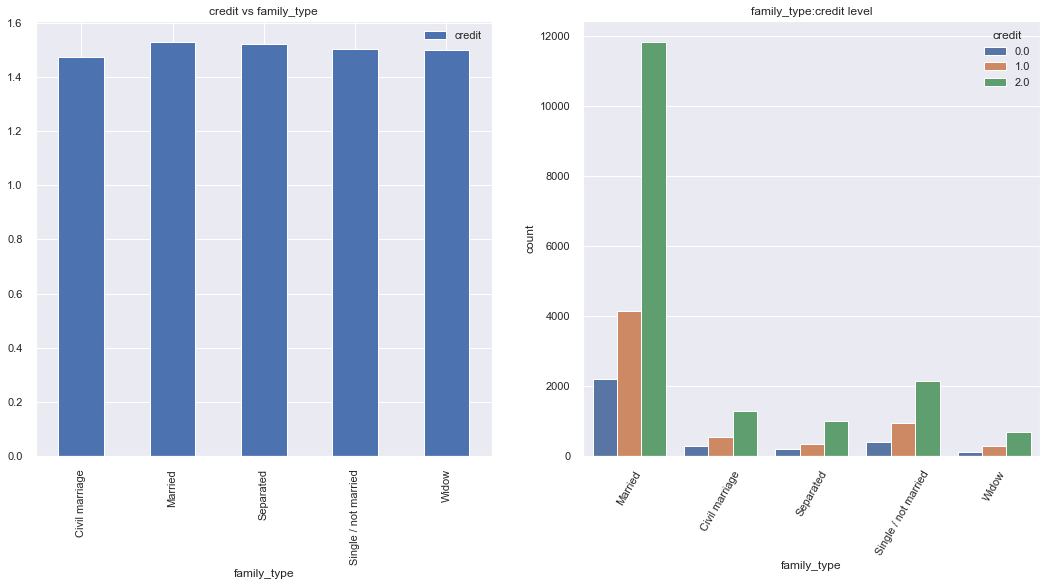

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['family_type','credit']].groupby(['family_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_type')
sns.countplot('family_type',hue='credit',data=data,ax=ax[1])
ax[1].set_title('family_type:credit level')
plt.xticks(rotation=60)
plt.show()

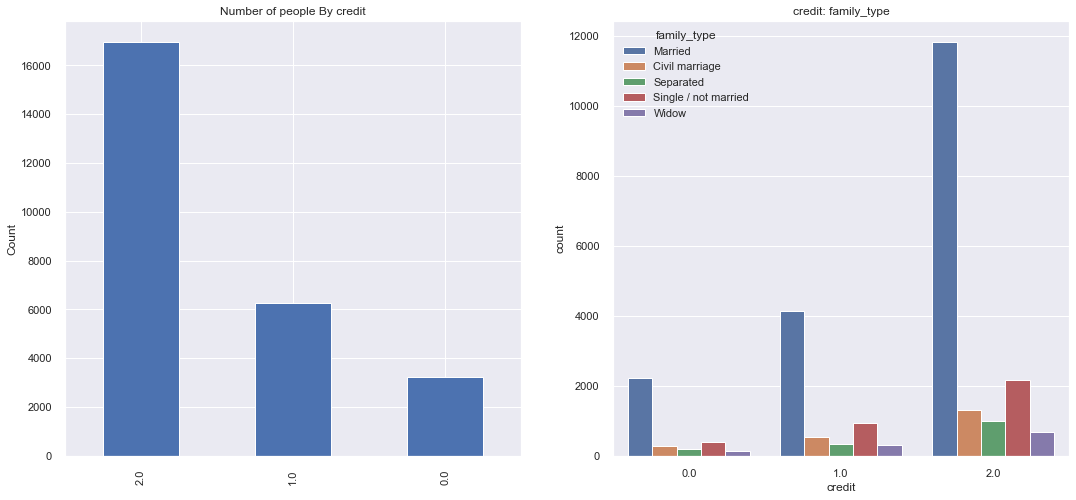

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['credit'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of people By credit')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='family_type',data=data,ax=ax[1])
ax[1].set_title('credit: family_type')
plt.show()

### 가족 수 Family size

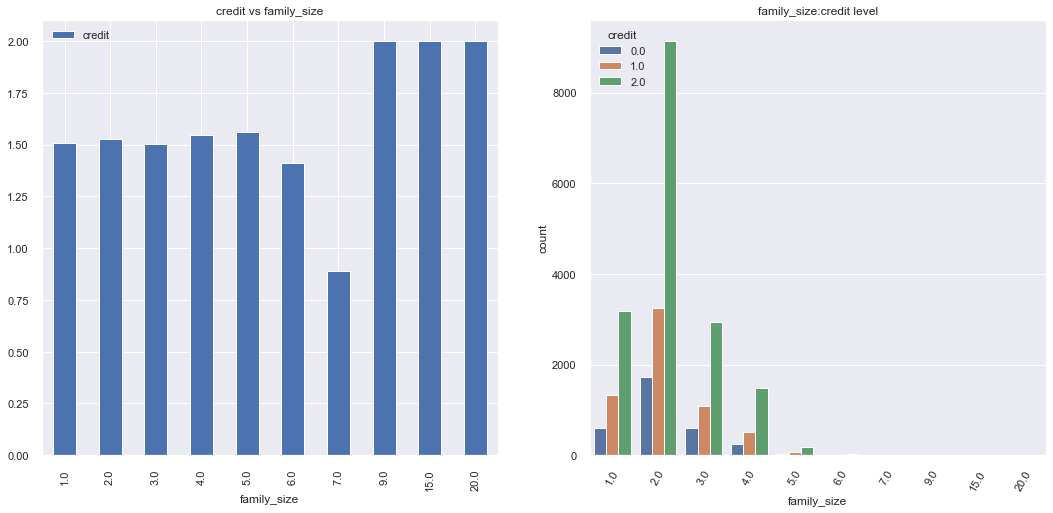

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['family_size','credit']].groupby(['family_size']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs family_size')
sns.countplot('family_size',hue='credit',data=data,ax=ax[1])
ax[1].set_title('family_size:credit level')
plt.xticks(rotation=60)
plt.show()

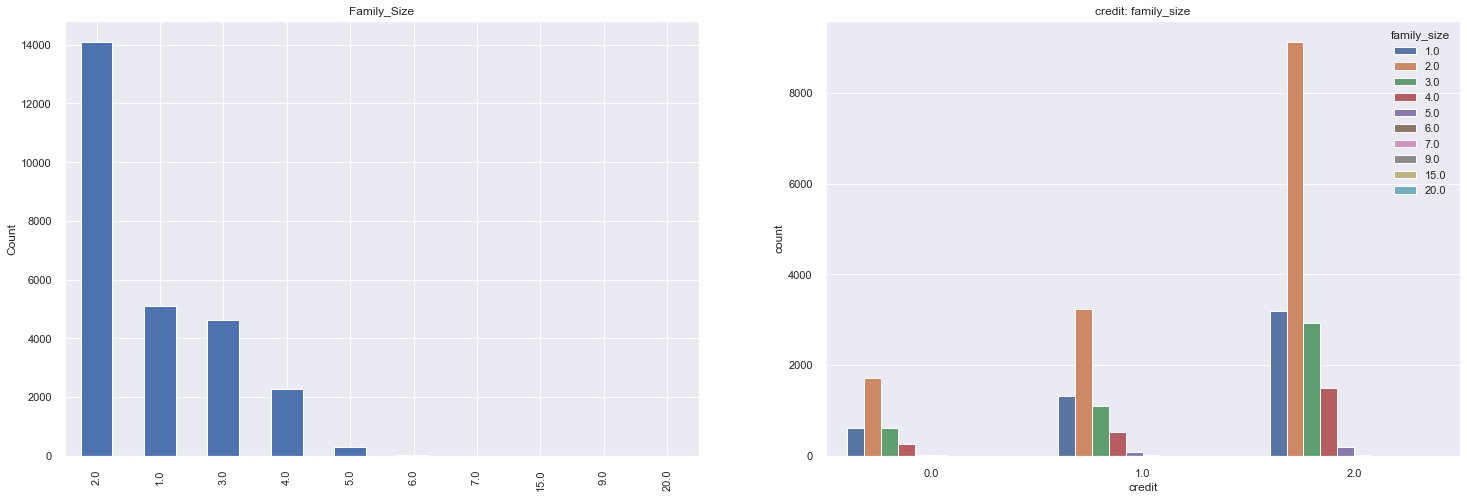

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,8))
data['family_size'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Family_Size')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='family_size',data=data,ax=ax[1])
ax[1].set_title('credit: family_size')
plt.show()

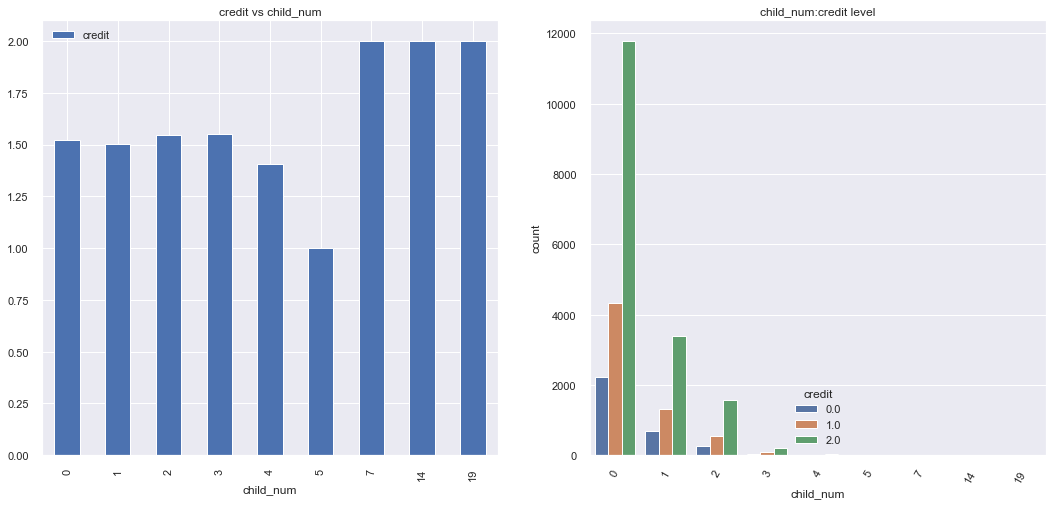

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['child_num','credit']].groupby(['child_num']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs child_num')
sns.countplot('child_num',hue='credit',data=data,ax=ax[1])
ax[1].set_title('child_num:credit level')
plt.xticks(rotation=60)
plt.show()

### 소득 income type

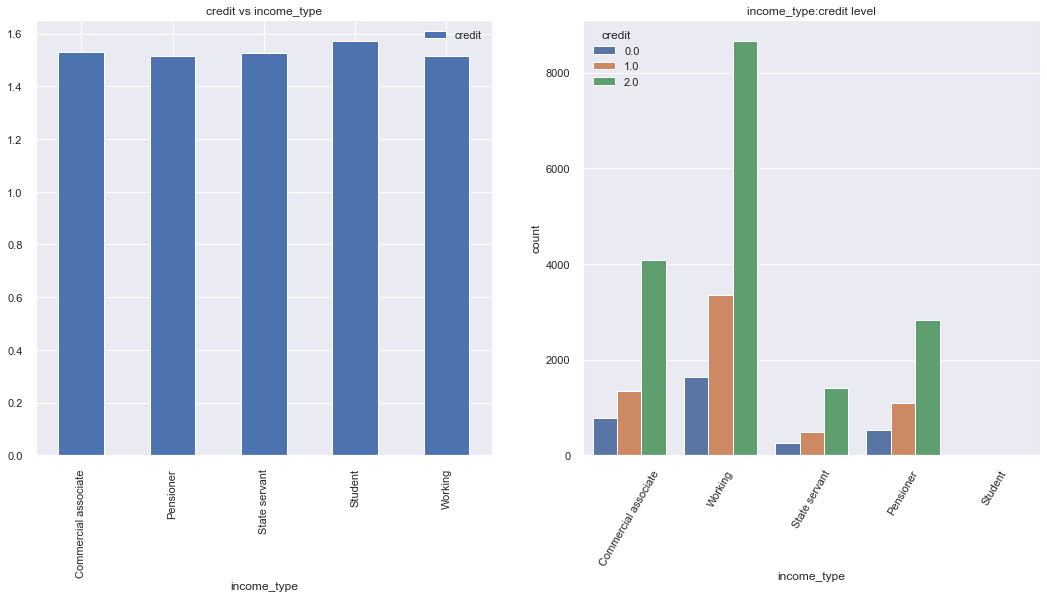

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['income_type','credit']].groupby(['income_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs income_type')
sns.countplot('income_type',hue='credit',data=data,ax=ax[1])
ax[1].set_title('income_type:credit level')
plt.xticks(rotation=60)
plt.show()

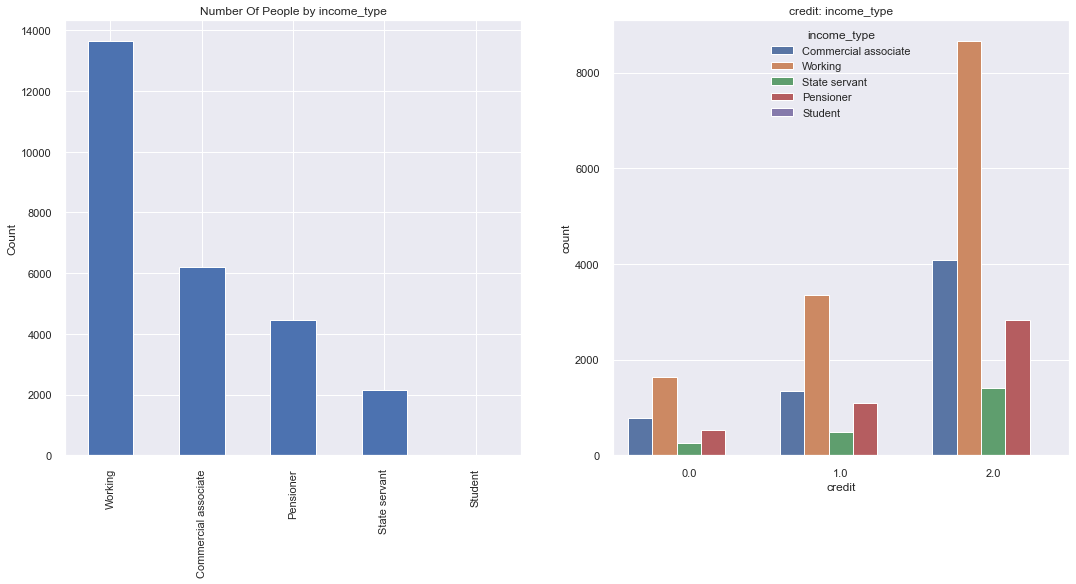

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['income_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of People by income_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='income_type',data=data,ax=ax[1])
ax[1].set_title('credit: income_type')
plt.show()

### 직업 유형 occyp type

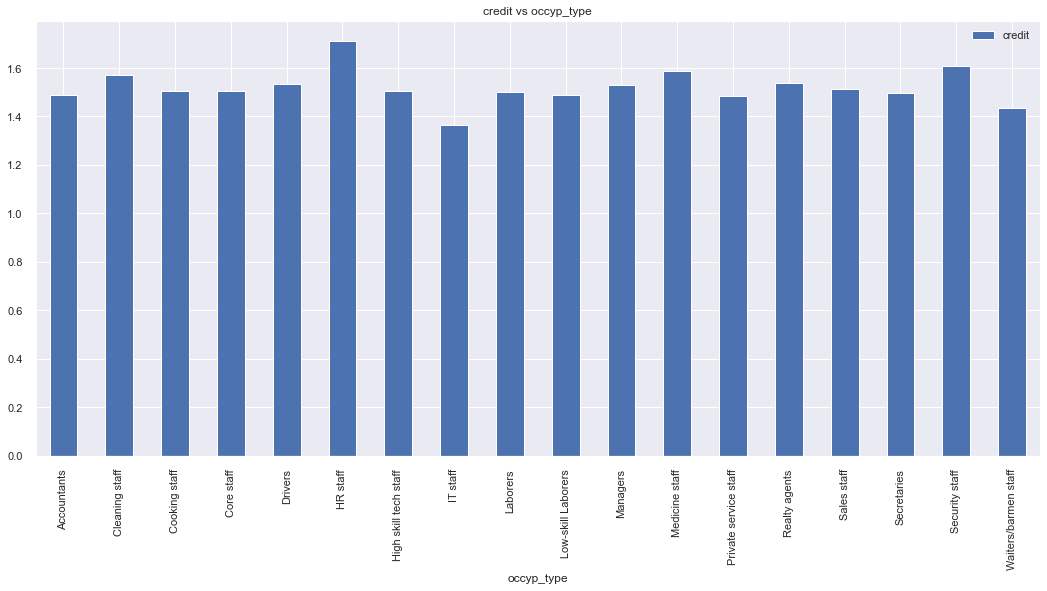

In [ ]:
f,ax = plt.subplots(1,1,figsize=(18,8))
data[['occyp_type','credit']].groupby(['occyp_type']).mean().plot.bar(ax=ax)
plt.title('credit vs occyp_type')
plt.show()

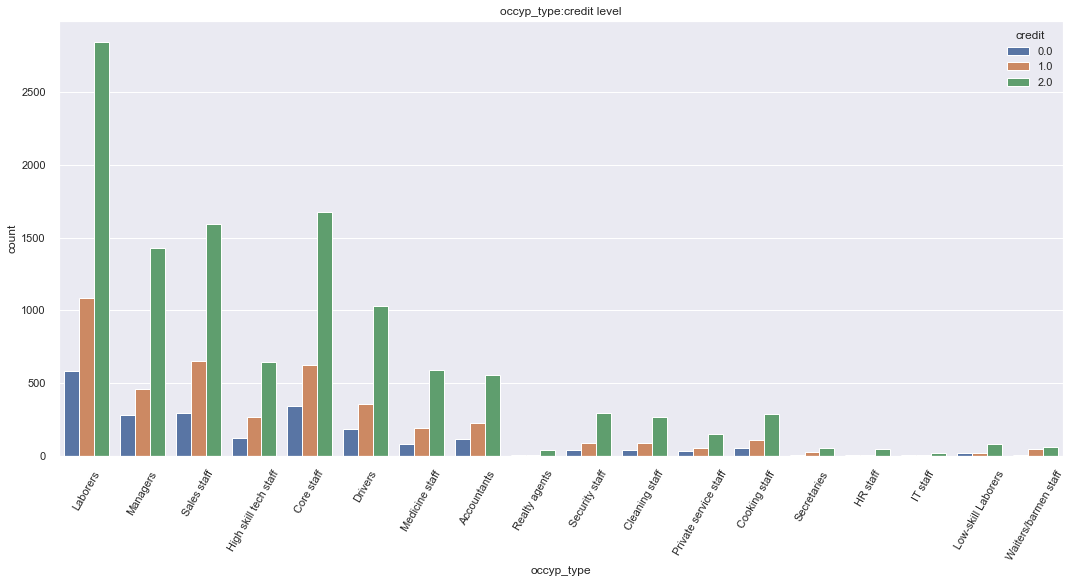

In [ ]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('occyp_type',hue='credit',data=data,ax=ax)
plt.title('occyp_type:credit level')
plt.xticks(rotation=60)
plt.show()

### 교육 수준 edu type

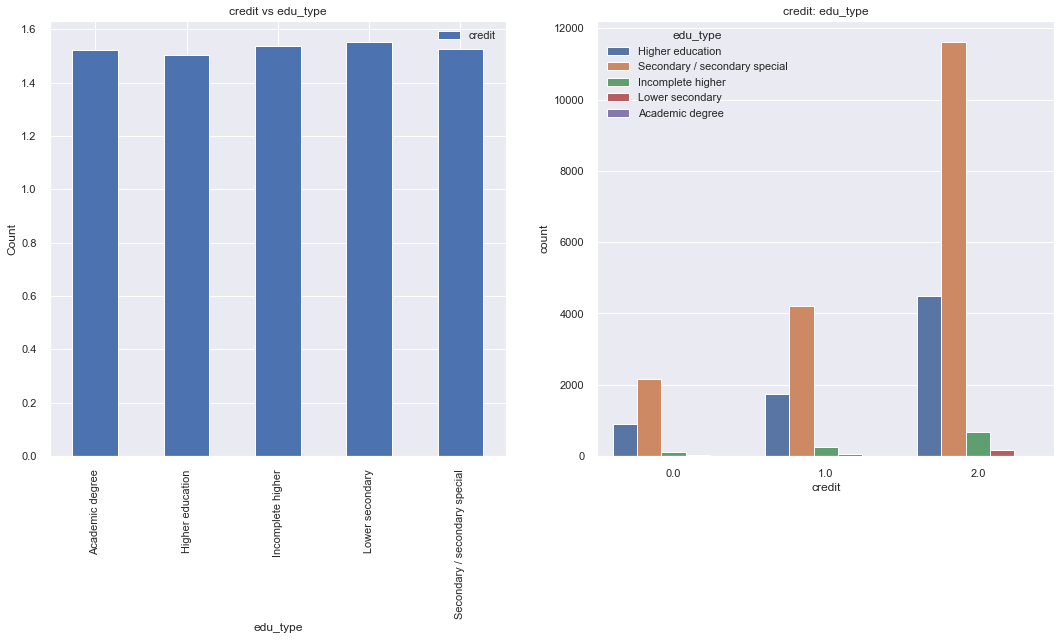

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['edu_type','credit']].groupby(['edu_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs edu_type')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='edu_type',data=data,ax=ax[1])
ax[1].set_title('credit: edu_type')
plt.show()

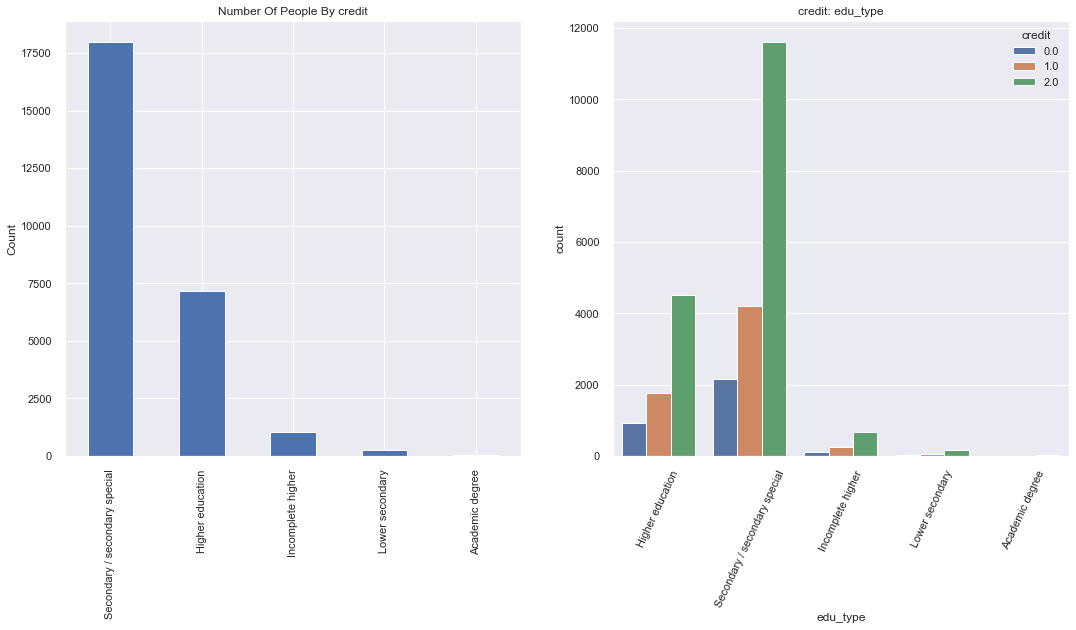

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['edu_type'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of People By credit')
ax[0].set_ylabel('Count')
sns.countplot('edu_type',hue='credit',data=data,ax=ax[1])
ax[1].set_title('credit: edu_type')
plt.xticks(rotation=65)
plt.show()

### 핸드폰 소유 여부 FLAG MOBIL

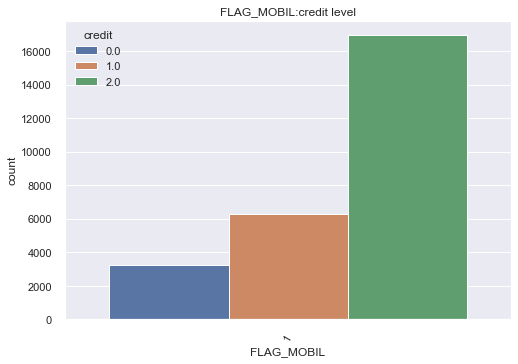

In [ ]:
sns.countplot('FLAG_MOBIL',hue='credit',data=data)
plt.title('FLAG_MOBIL:credit level')
plt.xticks(rotation=60)
plt.show()

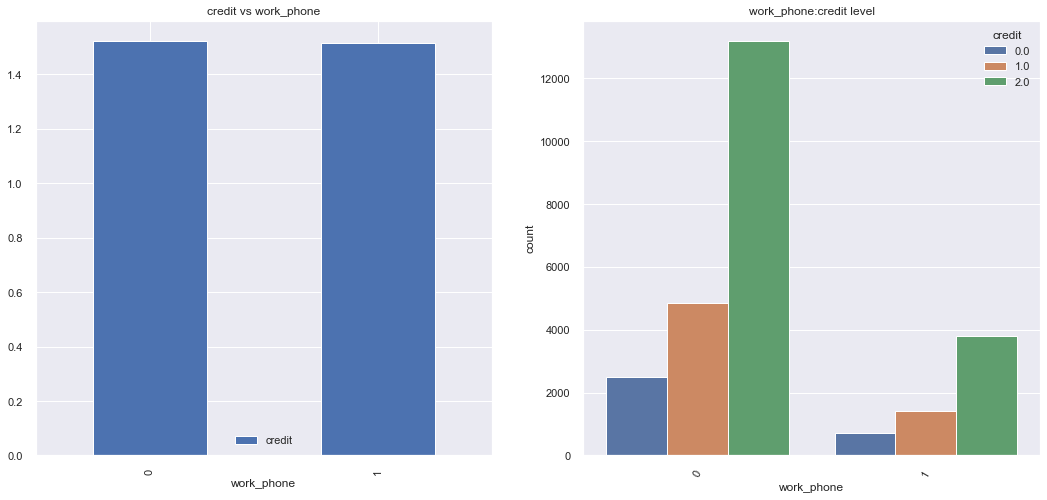

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['work_phone','credit']].groupby(['work_phone']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs work_phone')
sns.countplot('work_phone',hue='credit',data=data,ax=ax[1])
ax[1].set_title('work_phone:credit level')
plt.xticks(rotation=60)
plt.show()

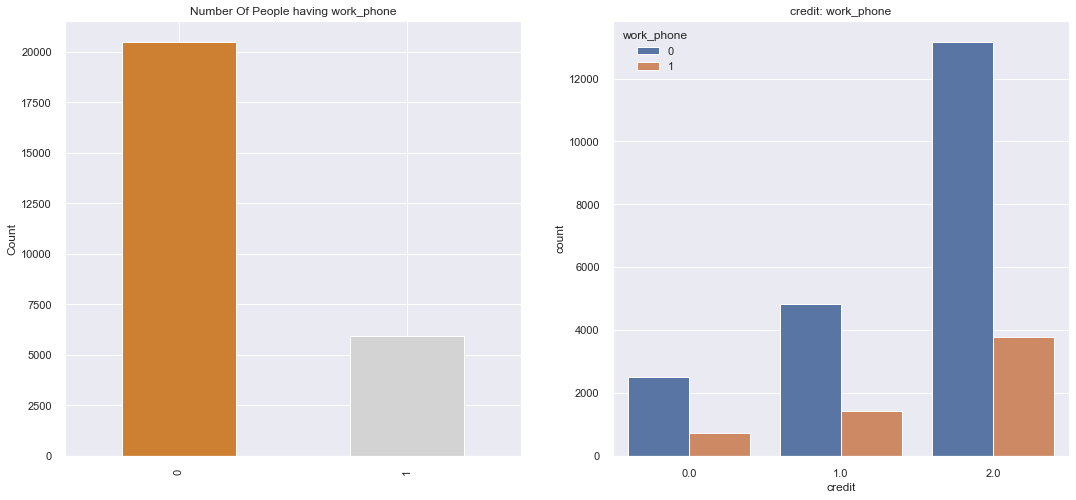

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['work_phone'].value_counts().plot.bar(color=['#CD7F32','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of People having work_phone')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='work_phone',data=data,ax=ax[1])
ax[1].set_title('credit: work_phone')
plt.show()

### 이메일 Email

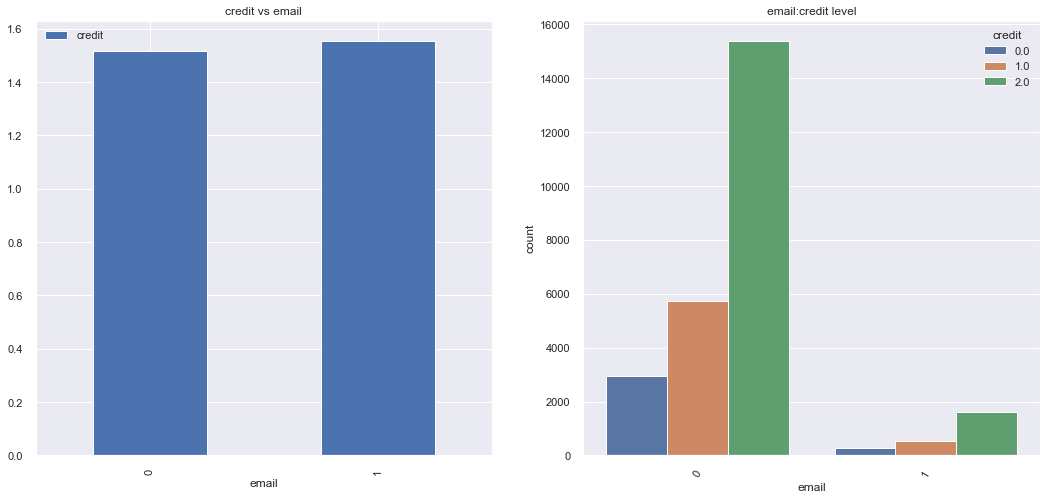

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['email','credit']].groupby(['email']).mean().plot.bar(ax=ax[0])
ax[0].set_title('credit vs email')
sns.countplot('email',hue='credit',data=data,ax=ax[1])
ax[1].set_title('email:credit level')
plt.xticks(rotation=60)
plt.show()

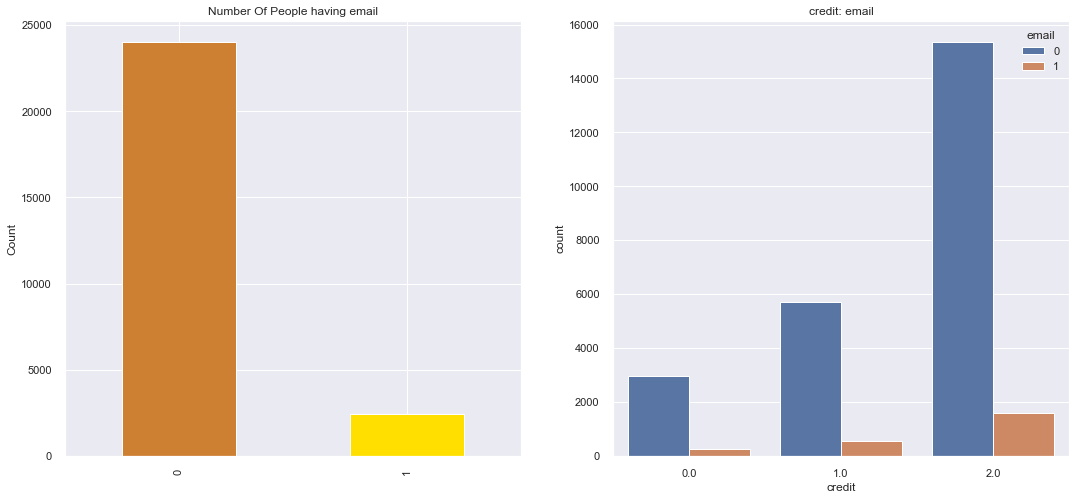

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['email'].value_counts().plot.bar(color=['#CD7F32','#FFDF00'],ax=ax[0])
ax[0].set_title('Number Of People having email')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='email',data=data,ax=ax[1])
ax[1].set_title('credit: email')
plt.show()

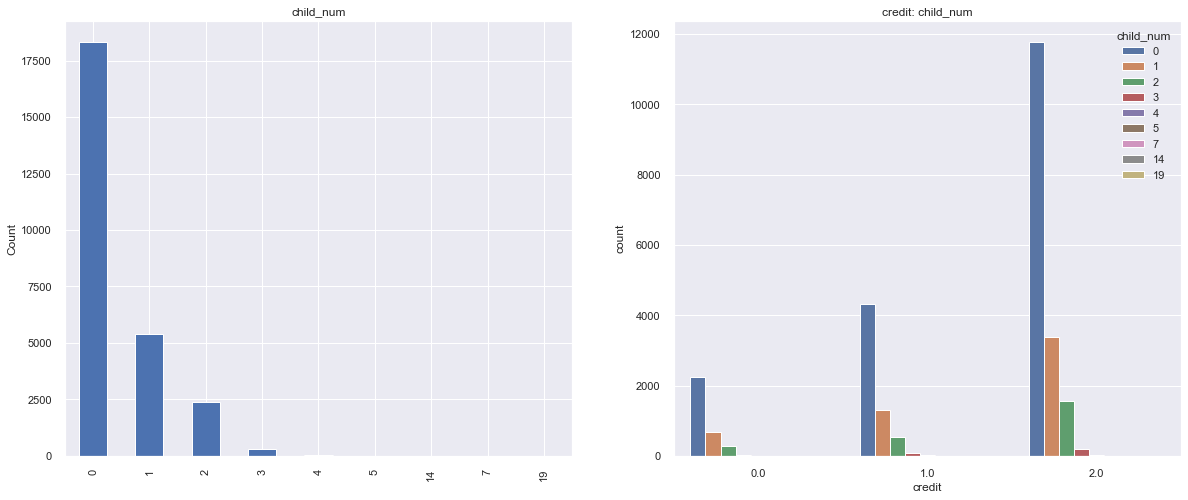

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
data['child_num'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('child_num')
ax[0].set_ylabel('Count')
sns.countplot('credit',hue='child_num',data=data,ax=ax[1])
ax[1].set_title('credit: child_num')
plt.show()

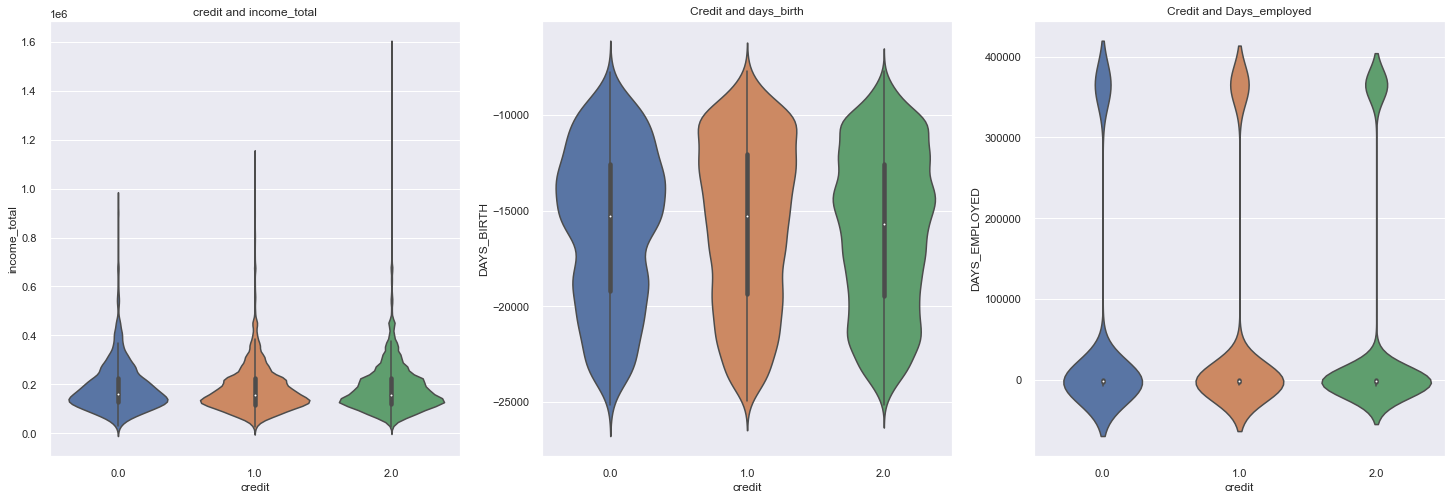

In [ ]:
f,ax=plt.subplots(1,3,figsize=(25,8))
sns.violinplot("credit","income_total", data=data,split=True,ax=ax[0])
ax[0].set_title('credit and income_total')
#ax[0].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_BIRTH",  data=data,split=True,ax=ax[1])
ax[1].set_title('Credit and days_birth')
#ax[1].set_yticks(range(0,110,10))
sns.violinplot("credit","DAYS_EMPLOYED", data=data,split=True,ax=ax[2])
ax[2].set_title('Credit and Days_employed')
#ax[1].set_yticks(range(0,110,10))
plt.show()

## Numerical

### 출생일 Days Birth

In [ ]:
data.query('DAYS_BIRTH>=0')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
# - 365를 나눠주어 year로 바꿔줌
(data['DAYS_BIRTH'] / -365).describe()

count    26457.000000
mean        43.720696
std         11.511203
min         21.109589
25%         34.098630
50%         42.594521
75%         53.235616
max         68.909589
Name: DAYS_BIRTH, dtype: float64

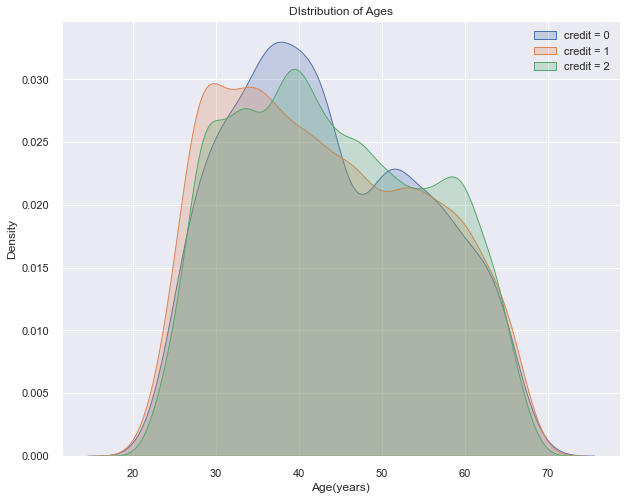

In [ ]:
plt.figure(figsize = (10,8))

sns.kdeplot(data.loc[data['credit'] == 0, 'DAYS_BIRTH'] / -365, label = 'credit = 0', fill = True)
sns.kdeplot(data.loc[data['credit'] == 1, 'DAYS_BIRTH'] / -365, label = 'credit = 1', fill = True)
sns.kdeplot(data.loc[data['credit'] == 2, 'DAYS_BIRTH'] / -365, label = 'credit = 2', fill = True)
plt.title('DIstribution of Ages', size = 12)
plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.legend()

### 업무시작일 DAYS EMPLOYED

In [ ]:
data.query('DAYS_EMPLOYED>0')
# 4438 개 > 고용되지 않음 
data.query('DAYS_EMPLOYED>0')[['index','income_type','occyp_type']] 
# Pensioner	: 연금 수령자 
data.query('DAYS_EMPLOYED>0 and income_type!="Pensioner"')

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
# 업무시작일에 365243이라는 이상값 발견
(data['DAYS_EMPLOYED']).describe()

count     26457.000000
mean      59068.750728
std      137475.427503
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

<Figure size 1080x576 with 0 Axes>

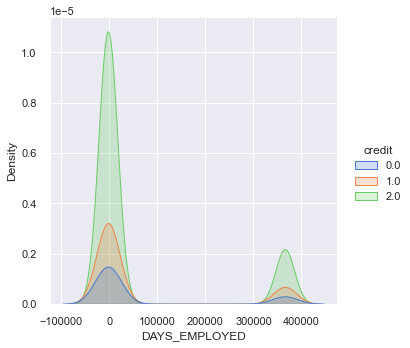

In [ ]:
plt.figure(figsize = (15,8))
sns.displot(x = 'DAYS_EMPLOYED', data = data, kind = 'kde', fill = True, hue = 'credit', palette='muted')
plt.show()

In [ ]:
anom = data[data['DAYS_EMPLOYED'] == 365243]
non_anom = data[data['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies mean {} '.format(non_anom['credit'].mean()))
print('The anomalies mean {}'.format(anom['credit'].mean()))
print('The non-anomalies count : {} '.format(len(anom)))

The non-anomalies mean 1.520641264362596 
The anomalies mean 1.5141955835962144
The non-anomalies count : 4438 


credit의 분포는 큰 차이 없는 것으로 보인다.

### 상관계수

In [ ]:
correlations = data.corr()['credit'].sort_values(ascending = False)
print('Most Positive Variable: \n', correlations.head(8))
print('\nMost Negative Variable: \n', correlations.tail(8))

Most Positive Variable: 
 credit           1.000000
email            0.014812
income_total     0.008555
family_size      0.008227
child_num        0.004081
phone            0.003452
work_phone      -0.003134
DAYS_EMPLOYED   -0.003798
Name: credit, dtype: float64

Most Negative Variable: 
 child_num        0.004081
phone            0.003452
work_phone      -0.003134
DAYS_EMPLOYED   -0.003798
index           -0.007841
DAYS_BIRTH      -0.025187
begin_month     -0.147477
FLAG_MOBIL            NaN
Name: credit, dtype: float64


### 신용카드 발급월 Begin Month

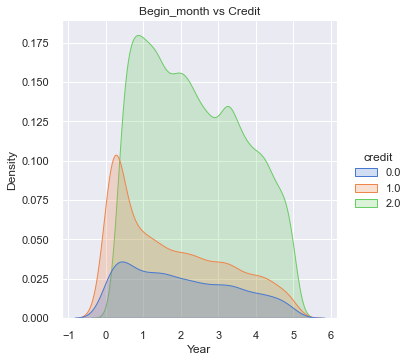

In [ ]:
sns.displot(x = data['begin_month'] / -12, hue = 'credit', data =data, fill = True, palette = 'muted', kind = 'kde')
plt.title('Begin_month vs Credit', size = 12)
plt.xlabel('Year')
plt.show()

## 참고
[데이콘 코드 공유](https://dacon.io/competitions/official/235713/codeshare/2494?page=4&dtype=recent) 

# 파생변수 만들기 

In [ ]:
correlations_email = data.corr()['email'].sort_values(ascending = False)
correlations_email

email            1.000000
DAYS_BIRTH       0.111238
income_total     0.089882
family_size      0.016122
child_num        0.016120
credit           0.014812
phone            0.012494
index            0.005332
begin_month      0.002320
work_phone      -0.031048
DAYS_EMPLOYED   -0.091090
FLAG_MOBIL            NaN
Name: email, dtype: float64

In [ ]:
print('이메일 있는 사람들의 평균 수입 : ', data.query('email>0')[['income_total']].mean())
print('이메일 없 사람들의 평균 수입 : ', data.query('email<=0')[['income_total']].mean())

이메일 있는 사람들의 평균 수입 :  income_total    216198.236646
dtype: float64
이메일 없 사람들의 평균 수입 :  income_total    184404.374719
dtype: float64


In [ ]:
correlations_birth = data.corr()['DAYS_BIRTH'].sort_values(ascending = False)
correlations_birth

DAYS_BIRTH       1.000000
child_num        0.332816
family_size      0.298108
work_phone       0.178752
email            0.111238
income_total     0.064155
begin_month      0.057306
index           -0.008901
credit          -0.025187
phone           -0.029247
DAYS_EMPLOYED   -0.616776
FLAG_MOBIL            NaN
Name: DAYS_BIRTH, dtype: float64

In [ ]:
data.query('child_num==0 and family_type=="Married" ').describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,11828.000000,11828.0,1.182800e+04,11828.000000,11828.000000,11828.0,11828.000000,11828.000000,11828.000000,11828.0,11828.000000,11828.000000
mean,13204.563071,0.0,1.838395e+05,-17227.825499,79999.985543,1.0,0.221931,0.309520,0.083108,2.0,-26.678728,1.530521
std,7645.095539,0.0,1.015375e+05,4109.893431,153816.809677,0.0,0.415563,0.462315,0.276057,0.0,16.622236,0.701975
min,0.000000,0.0,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,2.0,-60.000000,0.000000
25%,6556.750000,0.0,1.125000e+05,-20643.000000,-3271.000000,1.0,0.000000,0.000000,0.000000,2.0,-40.000000,1.000000
50%,13157.500000,0.0,1.575000e+05,-17651.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.0,-25.000000,2.000000
75%,19788.250000,0.0,2.250000e+05,-14070.000000,-200.000000,1.0,0.000000,1.000000,0.000000,2.0,-12.000000,2.000000
max,26451.000000,0.0,1.350000e+06,-8056.000000,365243.000000,1.0,1.000000,1.000000,1.000000,2.0,0.000000,2.000000


1. child_num과 family_size, DAYS_BIRTH는 높은 상관관계가 있어보임 
이들을 어떻게 그룹화하는가 
나이 > 10대, 20대, 30대, 40대,50대,60대,70대 이상 나눔 
child_num > 0,1 유무로만 나눔 
자식이 없는데 family_size가 크면 형제가 많음 > 부모님과 같이 산다. 